In [1]:
!pip install sparse_lmm


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA dataset/TCGA_Thymoma_(THYM)/TCGA.THYM.sampleMap_THYM_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA dataset/TCGA_Thymoma_(THYM)/TCGA.THYM.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [4]:
gene_fullname = 'TP53 gene'
gene = 'tp53'
condition = 'height'
condition_col = 'height'
trait = 'Thymoma'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')
gene_data.T

The clinical dataset has 73 features, and the gene dataset includes 20530 genes


sample,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-ZB-A96P-01,-3.952792,-2.926826,-0.531035,0.084928,-1.027578,-1.10181,0.300606,-4.262646,-0.075499,3.336528,...,-0.748878,-1.587117,0.951567,2.32521,-0.939977,-3.782086,-2.562227,-0.822495,-3.627433,-1.269912
TCGA-X7-A8M4-01,-2.710592,0.988674,-0.531035,0.223228,-0.788978,-0.51981,0.356006,-2.767846,0.509501,1.324728,...,-0.748878,1.103183,1.260667,2.05361,-1.172077,0.154814,0.947073,-0.096795,-1.654033,-0.693612
TCGA-4V-A9QI-01,-2.658192,2.026774,-0.531035,0.005328,-0.486978,-0.26401,0.807406,-0.934546,0.295501,-2.842272,...,-0.748878,-1.587117,1.656967,2.04671,-0.964477,-1.476686,-1.894627,0.029005,-0.925433,-0.837312
TCGA-4V-A9QL-01,-1.949092,1.423074,-0.135935,0.375828,-0.714478,-0.25681,0.347606,0.448754,-0.028299,4.179128,...,-0.748878,-1.587117,2.221467,2.45031,-0.200377,0.592514,1.003373,0.302205,0.763067,-0.543812
TCGA-X7-A8DE-01,-2.566592,-0.454626,-0.531035,0.101328,-0.874578,-0.37471,0.323906,-0.536646,0.590501,1.720228,...,0.265022,0.756983,1.075967,1.54971,-0.967777,-0.508386,-0.374627,-0.010895,0.817667,-0.677712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-XU-A92Z-01,-1.729592,-4.367826,-0.531035,-0.179472,-0.076978,-1.01791,0.607606,-0.160846,-0.423399,-1.876072,...,-0.237378,-1.587117,1.787367,1.83291,-0.546577,0.145114,0.607273,-0.428095,-2.411233,-0.571412
TCGA-X7-A8D8-01,-1.611992,1.148974,-0.531035,0.055328,-0.316578,-0.36281,0.104406,-0.837846,-0.423399,2.991828,...,-0.748878,0.310883,0.873567,3.41531,-0.229277,0.440014,0.993173,-0.139995,0.626667,-0.801412
TCGA-XU-A92O-01,-2.749892,-0.370226,-0.531035,0.230928,-0.656978,0.06289,0.422706,-0.332446,-0.423399,1.093628,...,0.238322,0.201983,0.976067,2.90381,-0.483077,-0.248286,0.146473,0.305105,0.668367,-0.151712
TCGA-X7-A8M8-01,-3.345692,0.211474,-0.531035,0.202528,-1.091378,-0.93941,0.286106,-2.375746,-0.423399,1.301528,...,-0.748878,0.072183,1.401767,2.52101,-1.166377,-0.704986,-0.541627,-0.070095,-2.975333,-0.808312


In [5]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T, rsuffix='_gd')

merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O-01,TCGA-3G-AB0O-01,TCGA-3G-AB0O,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,47.0,TCGA-3G-AB0O-F72300,TCGA-3G-AB0O,...,-0.748878,-0.269917,1.363067,1.17161,-0.992077,-1.998386,-1.857627,-0.052595,0.500067,-1.193112
TCGA-3G-AB0Q-01,TCGA-3G-AB0Q-01,TCGA-3G-AB0Q,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,66.0,TCGA-3G-AB0Q-F72301,TCGA-3G-AB0Q,...,0.011122,3.437683,1.371367,3.39781,-0.058577,1.711014,0.776973,0.146905,-0.547633,-0.567012
TCGA-3G-AB0T-01,TCGA-3G-AB0T-01,TCGA-3G-AB0T,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,45.0,NaN,TCGA-3G-AB0T,...,-0.748878,-1.587117,2.297467,-0.65959,-1.021877,-0.706686,0.077173,1.154605,0.809667,-0.628012
TCGA-3G-AB14-01,TCGA-3G-AB14-01,TCGA-3G-AB14,TCGA Thymoma (THYM),thymoma,Thymus,NaN,NaN,51.0,TCGA-3G-AB14-F63587,TCGA-3G-AB14,...,0.190622,-1.587117,1.469667,2.46181,0.228423,0.437814,-1.282927,0.882805,-0.762233,-0.714512
TCGA-3G-AB19-01,TCGA-3G-AB19-01,TCGA-3G-AB19,TCGA Thymoma (THYM),thymoma,Thymus,NO,YES,76.0,TCGA-3G-AB19-F72302,TCGA-3G-AB19,...,0.506322,0.099583,0.993767,3.25411,0.058723,-0.817186,0.828273,0.279705,-1.407333,-0.726912


In [6]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,height,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O-01,172.0,-3.523092,-1.918126,-0.531035,0.172928,-0.989278,-0.98941,0.543606,-1.462046,0.572601,...,-0.748878,-0.269917,1.363067,1.17161,-0.992077,-1.998386,-1.857627,-0.052595,0.500067,-1.193112
TCGA-3G-AB0Q-01,175.0,-1.229792,2.802774,-0.531035,0.302428,-0.153078,0.11219,0.434706,-2.485546,-0.423399,...,0.011122,3.437683,1.371367,3.39781,-0.058577,1.711014,0.776973,0.146905,-0.547633,-0.567012
TCGA-3G-AB0T-01,185.0,-2.102092,-3.145926,-0.531035,0.121728,-1.219978,-1.25601,0.461306,1.252054,-0.423399,...,-0.748878,-1.587117,2.297467,-0.65959,-1.021877,-0.706686,0.077173,1.154605,0.809667,-0.628012
TCGA-3G-AB14-01,169.0,-0.743092,3.065074,0.972665,-0.045572,-0.621278,-0.47431,0.684306,-0.621846,-0.423399,...,0.190622,-1.587117,1.469667,2.46181,0.228423,0.437814,-1.282927,0.882805,-0.762233,-0.714512
TCGA-3G-AB19-01,149.0,-1.432492,-1.164326,-0.177835,-0.126172,0.227822,0.30389,0.044306,-2.148746,-0.423399,...,0.506322,0.099583,0.993767,3.25411,0.058723,-0.817186,0.828273,0.279705,-1.407333,-0.726912


In [7]:

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,height,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Thymoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O-01,172.0,-3.523092,-1.918126,-0.531035,0.172928,-0.989278,-0.98941,0.543606,-1.462046,0.572601,...,-0.269917,1.363067,1.17161,-0.992077,-1.998386,-1.857627,-0.052595,0.500067,-1.193112,1
TCGA-3G-AB0Q-01,175.0,-1.229792,2.802774,-0.531035,0.302428,-0.153078,0.11219,0.434706,-2.485546,-0.423399,...,3.437683,1.371367,3.39781,-0.058577,1.711014,0.776973,0.146905,-0.547633,-0.567012,1
TCGA-3G-AB0T-01,185.0,-2.102092,-3.145926,-0.531035,0.121728,-1.219978,-1.25601,0.461306,1.252054,-0.423399,...,-1.587117,2.297467,-0.65959,-1.021877,-0.706686,0.077173,1.154605,0.809667,-0.628012,1
TCGA-3G-AB14-01,169.0,-0.743092,3.065074,0.972665,-0.045572,-0.621278,-0.47431,0.684306,-0.621846,-0.423399,...,-1.587117,1.469667,2.46181,0.228423,0.437814,-1.282927,0.882805,-0.762233,-0.714512,1
TCGA-3G-AB19-01,149.0,-1.432492,-1.164326,-0.177835,-0.126172,0.227822,0.30389,0.044306,-2.148746,-0.423399,...,0.099583,0.993767,3.25411,0.058723,-0.817186,0.828273,0.279705,-1.407333,-0.726912,1


In [8]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

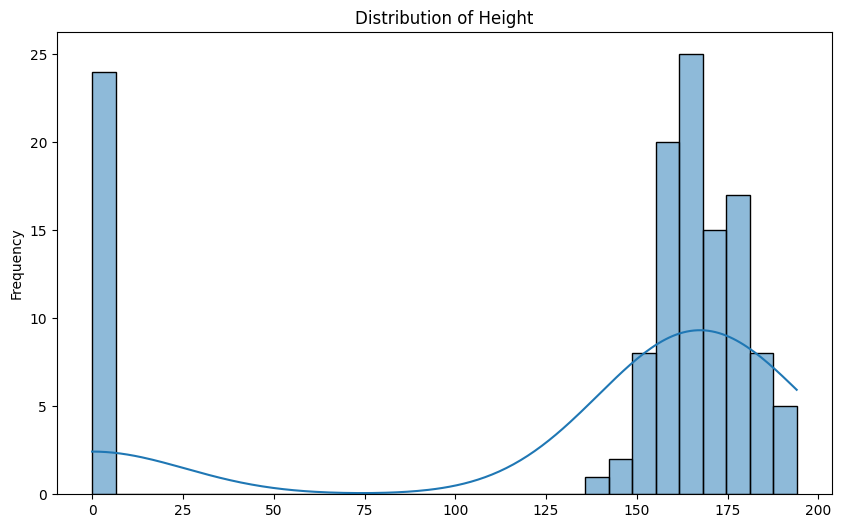

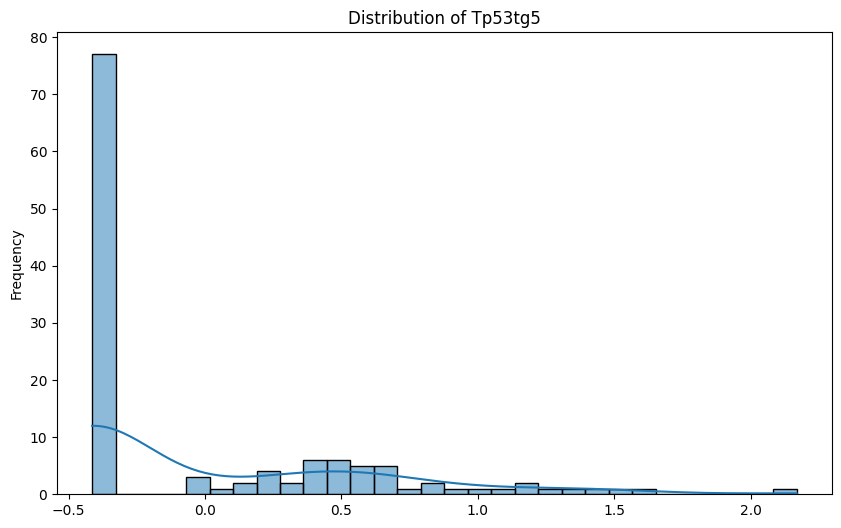

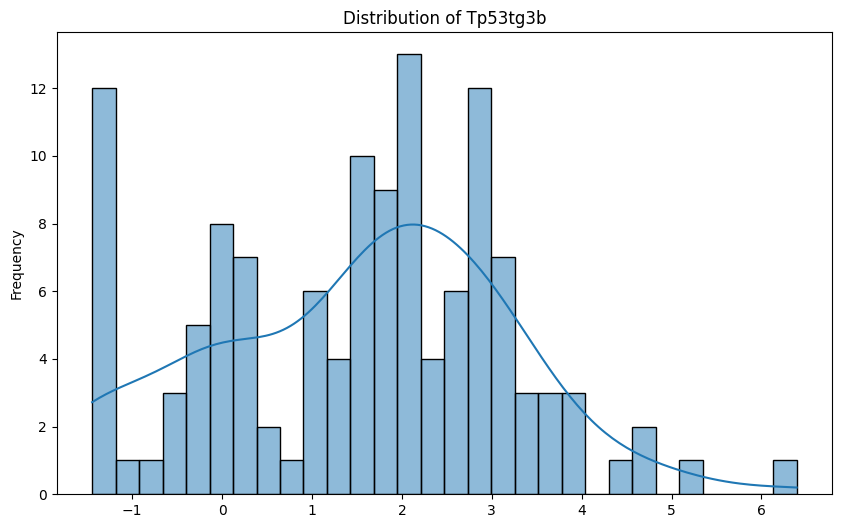

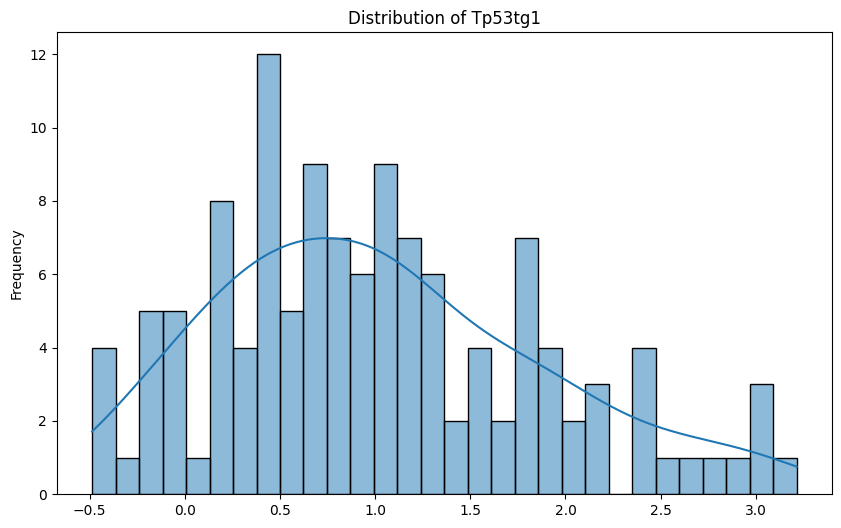

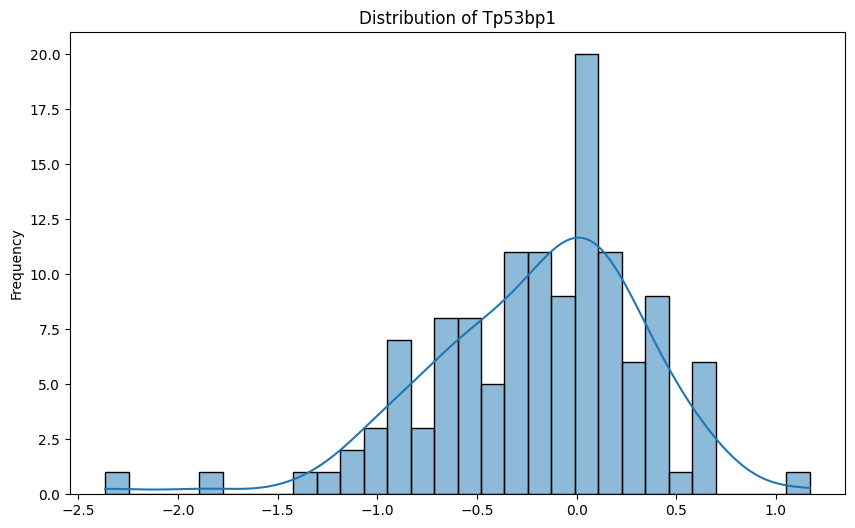

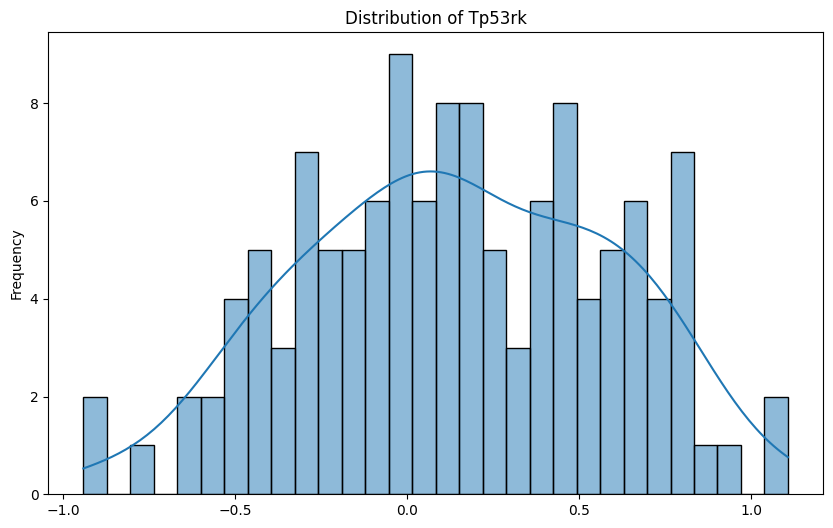

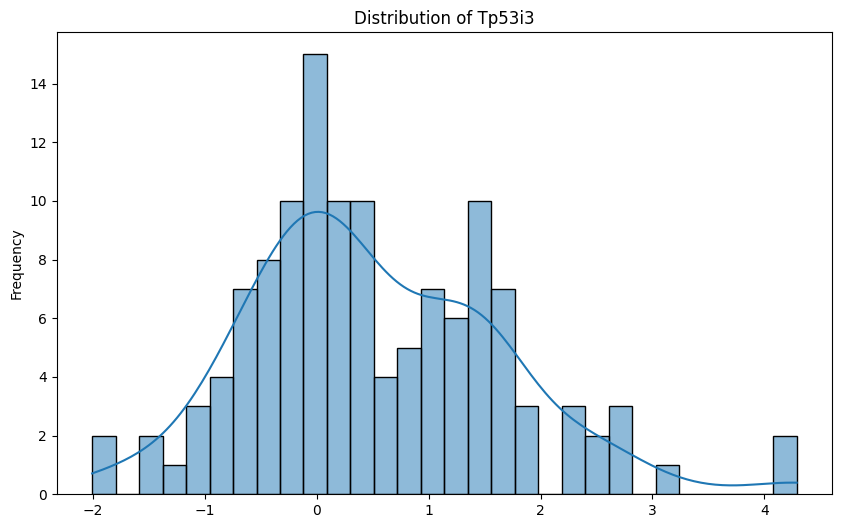

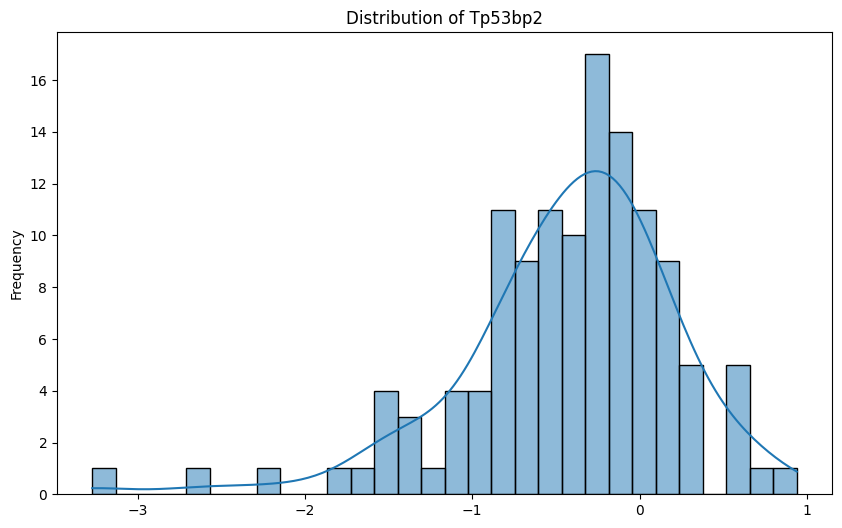

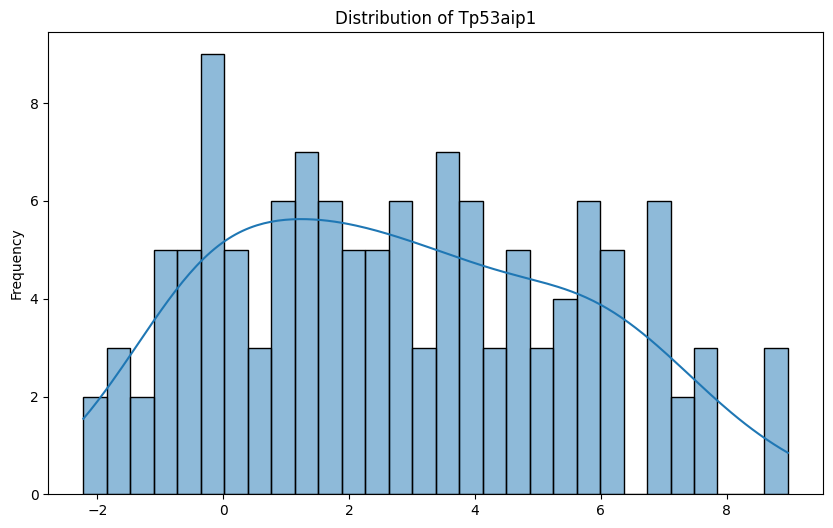

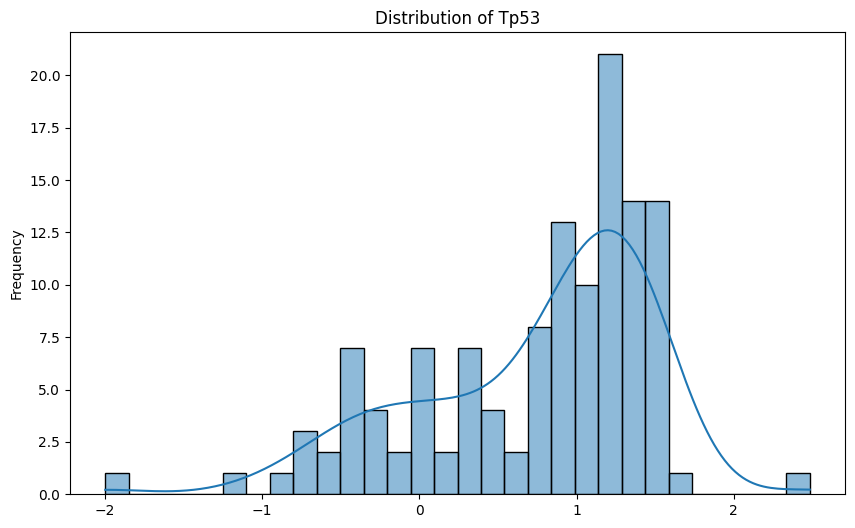

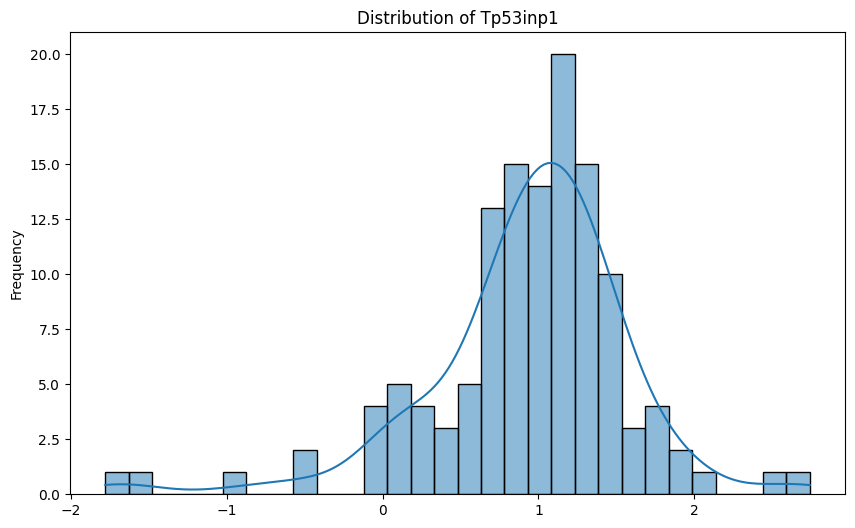

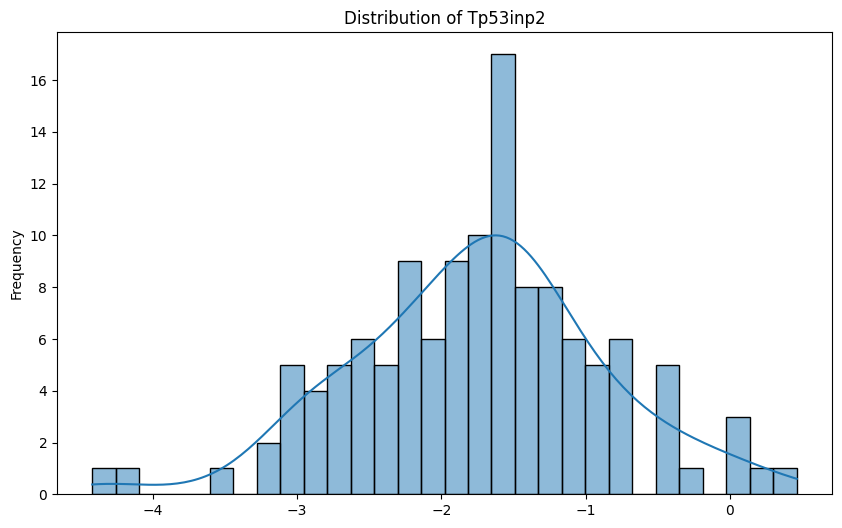

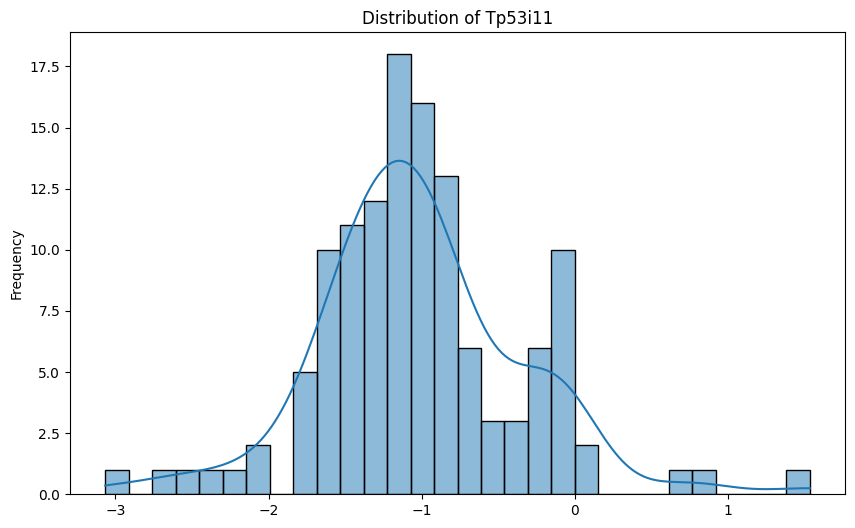

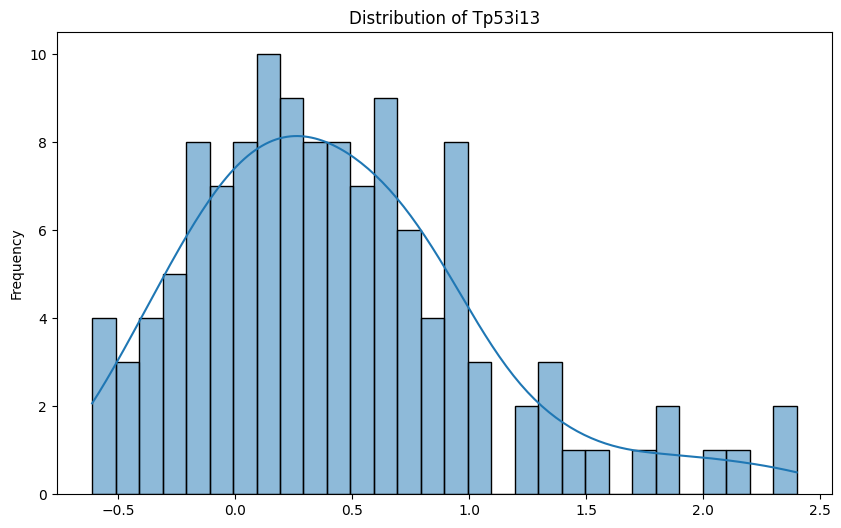

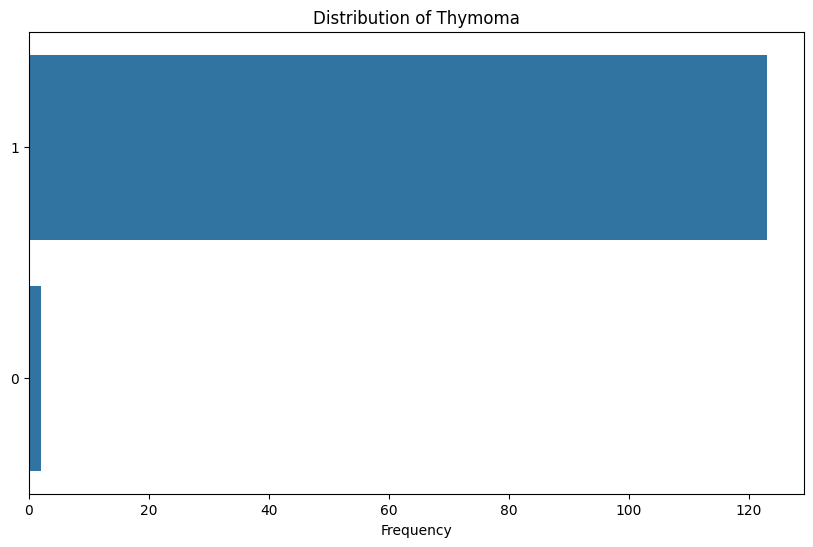

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

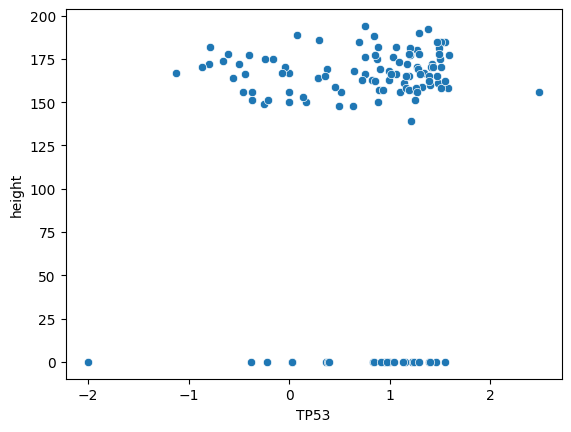

In [11]:
sns.scatterplot(data=merged_data, x='TP53', y=condition_col)
plt.show()

In [12]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,height,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Thymoma
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3G-AB0O-01,0,-3.523092,-1.918126,-0.531035,0.172928,-0.989278,-0.98941,0.543606,-1.462046,0.572601,...,-0.269917,1.363067,1.17161,-0.992077,-1.998386,-1.857627,-0.052595,0.500067,-1.193112,1
TCGA-3G-AB0Q-01,0,-1.229792,2.802774,-0.531035,0.302428,-0.153078,0.11219,0.434706,-2.485546,-0.423399,...,3.437683,1.371367,3.39781,-0.058577,1.711014,0.776973,0.146905,-0.547633,-0.567012,1
TCGA-3G-AB0T-01,0,-2.102092,-3.145926,-0.531035,0.121728,-1.219978,-1.25601,0.461306,1.252054,-0.423399,...,-1.587117,2.297467,-0.65959,-1.021877,-0.706686,0.077173,1.154605,0.809667,-0.628012,1
TCGA-3G-AB14-01,0,-0.743092,3.065074,0.972665,-0.045572,-0.621278,-0.47431,0.684306,-0.621846,-0.423399,...,-1.587117,1.469667,2.46181,0.228423,0.437814,-1.282927,0.882805,-0.762233,-0.714512,1
TCGA-3G-AB19-01,0,-1.432492,-1.164326,-0.177835,-0.126172,0.227822,0.30389,0.044306,-2.148746,-0.423399,...,0.099583,0.993767,3.25411,0.058723,-0.817186,0.828273,0.279705,-1.407333,-0.726912,1


In [13]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

C:\Users\Bobibob\AppData\Local\Temp\ipykernel_5508\2284219672.py:12: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
C:\Users\Bobibob\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sparse_lmm\VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


0.07008


In [14]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [15]:
# Print regression result

gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For tp53:
TP53TG5: Coefficient = -0.005735583724502576, p-value = 0.5282842595368931
TP53TG3B: Coefficient = -0.0009670184676381111, p-value = 0.9221126228034272
TP53TG1: Coefficient = 0.014963055548063384, p-value = 0.5065126987215931
TP53BP1: Coefficient = 0.00941987602383397, p-value = 0.6713896464712032
TP53RK: Coefficient = 0.02210012845744896, p-value = 0.3375750195332928
TP53I3: Coefficient = 0.0033052809515125496, p-value = 0.7876946539017904
TP53BP2: Coefficient = 0.008685913762001868, p-value = 0.7244792836937035
TP53AIP1: Coefficient = -0.006481571240438491, p-value = 0.6191843498072234
TP53: Coefficient = 0.00030524257097082704, p-value = 0.9887518082329158
TP53INP1: Coefficient = 0.011676125775067398, p-value = 0.45174125626964456
TP53INP2: Coefficient = -0.008787094818461037, p-value = 0.5866927082290023
TP53I11: Coefficient = -0.0071985263428676035, p-value = 0.5970437235205608
TP53I13: Coefficient = -0.0271057515364568, p-value = 0.1578090354446686


In [16]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between TP53 gene and Thymoma when considering the influence of height?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the TP53 gene and Thymoma when considering the influence of height.

Alternative Hypothesis (H1): There is an association between the expression of the TP53 gene and Thymoma when considering the influence of height.




In [17]:
# Interpretation of Regression Coefficients

threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: TP53TG5
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53TG3B
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53TG1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53BP1
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53RK
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53I3
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53BP2
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53AIP1
Coefficient is negative, and it is not statistically significant (p-value >= 0.05).

Variable: TP53
Coefficient is positive, and it is not statistically significant (p-value >= 0.05).

Variable: TP53INP1
Coefficient i

In [18]:
# Hypothesis Confirmation and Conclusion

# Create a function to determine if H0 or H1 is confirmed
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: TP53TG5
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53TG5 gene and Thymoma when considering the influence of height.

Variable: TP53TG3B
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53TG3B gene and Thymoma when considering the influence of height.

Variable: TP53TG1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53TG1 gene and Thymoma when considering the influence of height.

Variable: TP53BP1
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the TP53BP1 gene and Thymoma when considering the influence of height.

Variable: TP53RK
Conclusion: H0 is not rejected: There is insufficient evidence to conclu